## Exemple camera whit Alpaca and IndiClient

In [7]:
from alpaca import Camera
from ciboulette.indiclient import camera
from ciboulette.base import ciboulette
from ciboulette.utils import exposure

- Ciboulette class, camera class and exposure class initialised, Alpaca server started

In [2]:
cbl = ciboulette.Ciboulette()
cbl.serverport = {'SVR': '192.168.1.18', 'PORT': 11111} 
ccd = Camera(cbl.serverport,cbl.device)
exp = exposure.Exposure()
exp.exp_time = 5

- Camera configured Atik Titan

In [3]:
cbl.atiktitan
cbl.table.pprint(max_width = 255)

API        SERVER       DEVICE FOCAL DIAM SITE_LAT SITE_LONG SITE_ELEV  INSTRUME  NAXIS1 NAXIS2 BINXY PIXELXY FILTER     NAME     OBSERVER DATASET     ARCHIVES      RA DEC  OBJECT
---- ------------------ ------ ----- ---- -------- --------- --------- ---------- ------ ------ ----- ------- ------ ------------ -------- ------- ---------------- --- ---- ------
2000 192.168.1.18:11111      0  85.0   60  49.5961    359.65       100 Atik Titan    659    494     1     7.4      L CIBOULETTE-A     CAM1 dataset dataset/archives 0.0 90.0   INIT


- Exposure configured

In [4]:
cbl.exposure = exp

In [5]:
cbl.exposure

(5, 1, 'Intensity')

- Read the CCD with the Alpaca server and display

In [6]:
cbl.camera(ccd)

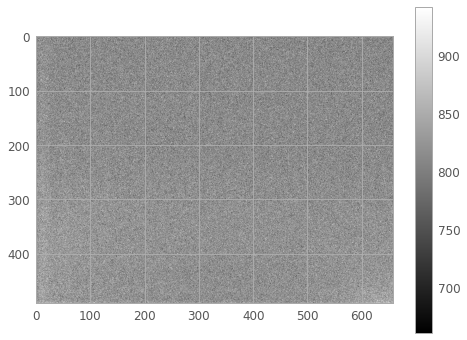

In [9]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('dataset/CAM1_INIT_1.fits')
image_data = fits.getdata(image_file, ext=0)
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

- Show fits header

In [11]:
fits.getheader(image_file)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  658                                                  
NAXIS2  =                  492                                                  
PIXSIZE1=    7.400000095367432 / [um] Pixel Size X, binned                      
PIXSIZE2=    7.400000095367432 / [um] Pixel Size Y, binned                      
XBINNING=                    1 / Binning factor X                               
YBINNING=                    1 / Binning factor Y                               
EXPTIME =                    5 / [s] Total Exposure Time                        
OBJECT  = 'INIT    '           / Observed object name                           
OBSERVER= 'CAM1    '           / Observed name                                  
TELESCOP= 'CIBOULETTE-A'    